<a href="https://colab.research.google.com/github/HKubinhetz/DS-Seaborn-and-Linear-Regression/blob/main/Seaborn_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/PythonDS/07 - Seaborn and Linear Regression/cost_revenue_dirty.csv')

Mounted at /content/drive


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
# How many rows and columns does the dataset contain?
data.shape

(5391, 6)

In [5]:
# Are there any NaN values present?
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [6]:
# Are there any duplicate rows?
data.duplicated().any()

False

In [7]:
# What are the data types of the columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3359,1987,4/12/2009,Brothers,"$26,000,000","$45,043,870","$28,544,157"
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
2961,3077,8/24/2007,Resurrecting the Champ,"$13,000,000","$3,260,555","$3,172,382"
3527,4864,12/6/2009,"Food, Inc.","$1,000,000","$4,731,944","$4,417,674"
4758,716,12/25/2014,Unbroken,"$65,000,000","$163,527,824","$115,637,895"


In [9]:
clean_df = data
clean_df["USD_Production_Budget"] = pd.to_numeric(clean_df["USD_Production_Budget"].str.replace('$', "").str.replace(',', ""))
clean_df["USD_Worldwide_Gross"] = pd.to_numeric(clean_df["USD_Worldwide_Gross"].str.replace('$', "").replace(',', "").str.replace(',', ""))
clean_df["USD_Domestic_Gross"] = pd.to_numeric(clean_df["USD_Domestic_Gross"].str.replace('$', "").replace(',', "").str.replace(',', ""))
clean_df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1068,739,3/20/1998,Primary Colors,65000000,39017984,39017984
2388,2120,3/6/2005,The Lords of Dogtown,25000000,13424365,11273517
3579,3554,2/4/2010,Leaves of Grass,9000000,85527,70066
1252,1248,5/28/1999,Notting Hill,42000000,363728226,116089678
4563,2237,2/28/2014,Son of God,22000000,70949793,59700064


In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

### Descriptive Statistics

In [11]:
clean_df["Release_Date"] = pd.to_datetime(clean_df["Release_Date"])
clean_df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4985,3696,2015-09-01,Black November,7500000,32572,0
4343,4271,2013-02-22,Dark Skies,3500000,27704111,17418667
1857,1046,2002-08-05,Unfaithful,50000000,119114494,52752475
4023,3034,2011-11-02,Justin Bieber: Never Say Never,13000000,99034125,73013910
4633,109,2014-07-11,Big Hero 6,165000000,652127828,222527828


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [13]:
# Most of the answers can be found through the 'describe' method. Now it is up to us to interpret this data.
clean_df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [14]:
# What is the average production budget of the films in the data set?
print(f"The average production budget of the films in this data set is {'{0:.2f}'.format(clean_df['USD_Production_Budget'].mean())} USD.")

The average production budget of the films in this data set is 31113737.58 USD.


In [15]:
# What is the average worldwide gross revenue of films?
print(f"The average gross revenue in this data set is {'{0:.2f}'.format(clean_df['USD_Worldwide_Gross'].mean())} USD.")

The average gross revenue in this data set is 88855421.96 USD.


In [16]:
# What were the minimums for worldwide and domestic revenue?
clean_df['USD_Worldwide_Gross'].min()
clean_df['USD_Domestic_Gross'].min()

0

In [17]:
# Are the bottom 25% of films actually profitable or do they lose money?
print(clean_df.quantile(0.25))
print("The data above shows that on average, the bottom 25% spends 5MM and profits 5,195MM.")

Rank                        1,348.50
USD_Production_Budget   5,000,000.00
USD_Worldwide_Gross     3,865,206.00
USD_Domestic_Gross      1,330,901.50
Name: 0.25, dtype: float64
The data above shows that on average, the bottom 25% spends 5MM and profits 5,195MM.


In [18]:
# What are the highest production budget and highest worldwide gross revenue of any film?
# Highest Production Budget
clean_df.sort_values(by='USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [19]:
# Highest Worldwide Gross Revenue
clean_df.sort_values(by='USD_Worldwide_Gross', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [20]:
# How much revenue did the lowest and highest budget films make?
clean_df.sort_values(by='USD_Production_Budget', ascending=True).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


The highest gross Revenue and Budget both belong to Avatar. The lowest budget is from a movie called My Date With Drew. The movie profited around 165 times its budget.

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [21]:
zero_revenue_movies = clean_df[clean_df['USD_Domestic_Gross']==0].sort_values(by='USD_Production_Budget', ascending=False)
zero_revenue_movies_count = zero_revenue_movies['USD_Domestic_Gross'].count()

print(f"There were {zero_revenue_movies_count} movies that grossed $0 domestically.")

There were 512 movies that grossed $0 domestically.


In [22]:
zero_revenue_movies.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [23]:
zero_revenue_movies_internationally = clean_df[clean_df['USD_Worldwide_Gross']==0].sort_values(by='USD_Production_Budget', ascending=False)
zero_revenue_movies_count_internationally = zero_revenue_movies_internationally["Movie_Title"].count()

print(f"There were {zero_revenue_movies_count_internationally} movies that grossed $0 internationally.")

There were 357 movies that grossed $0 internationally.


In [24]:
zero_revenue_movies_internationally.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [25]:
international_releases = clean_df.loc[(clean_df.USD_Domestic_Gross == 0) & 
                                  (clean_df.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [26]:
clean_df.query('USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [27]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [28]:
future_releases = clean_df[clean_df['Release_Date']>=scrape_date]

print(f"There were {len(future_releases)} non-released movies by the time this data was scraped.")

There were 7 non-released movies by the time this data was scraped.


In [29]:
# Dropping unreleased movies:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [30]:
losing_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
losing_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [31]:
losing_movies_ratio = len(losing_films)/len(data_clean)*100
losing_movies_percentage = '{:.2f}'.format(losing_movies_ratio)

print(f"The study shows that {losing_movies_percentage}% of all movies actually lose money.")

The study shows that 37.28% of all movies actually lose money.


# Seaborn for Data Viz: Bubble Charts

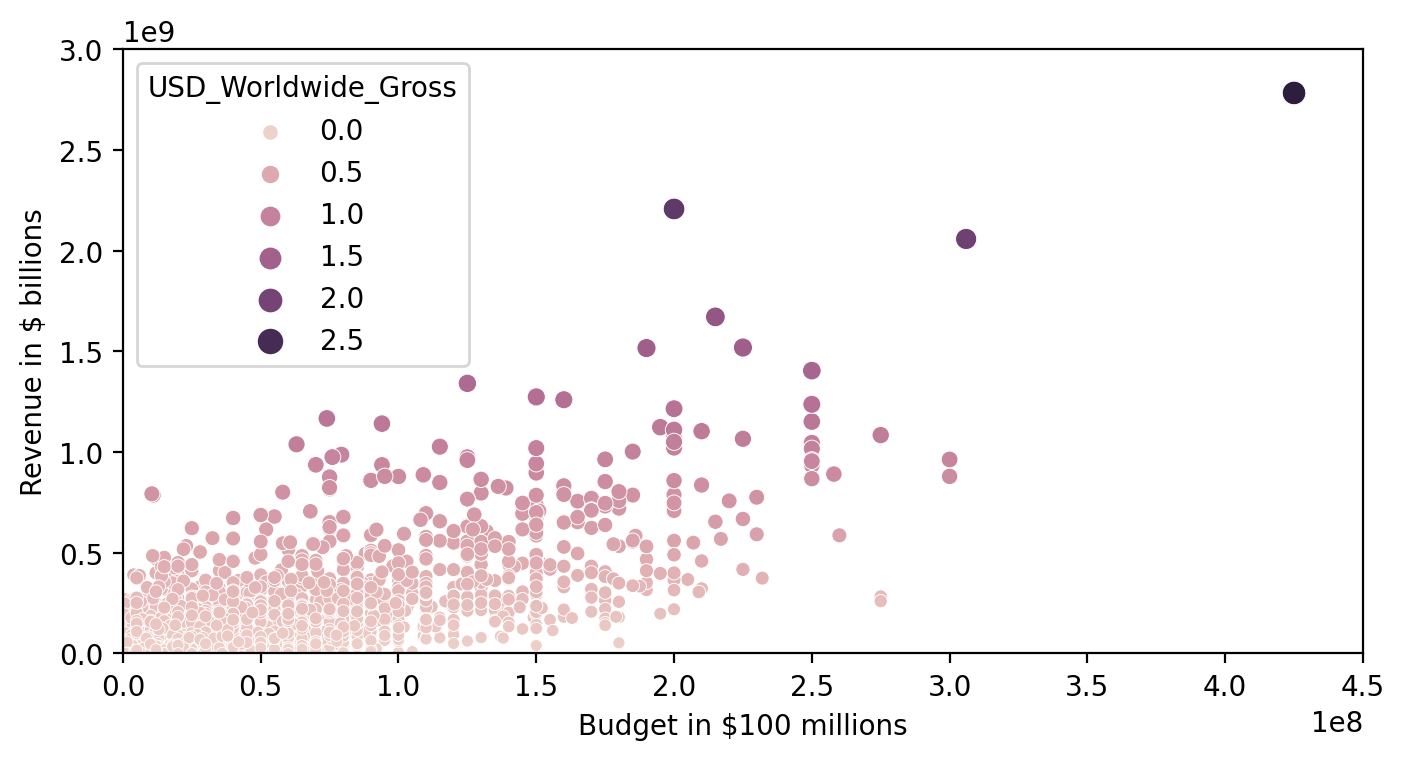

In [39]:
plt.figure(figsize=(8,4), dpi=200)
scatterplot = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', # colour
                size='USD_Worldwide_Gross') # dot size

scatterplot.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 